In [1]:
import pandas as pd


In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

datos = pd.read_json(url)

datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [5]:
df = pd.json_normalize(datos.to_dict(orient='records'), sep='_')

df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
datos_2 = pd.json_normalize(datos[['Churn','customer','account']].to_dict(orient='records'), sep='_')

datos_2.head(10)

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,No,Female,0,Yes,Yes,9,One year,Yes,Mailed check,65.60,593.3
1,No,Male,0,No,No,9,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,83.90,267.4
5,No,Female,0,No,Yes,9,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,No,Female,1,Yes,No,71,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,No,Male,0,Yes,No,63,Two year,Yes,Credit card (automatic),84.65,5377.8
8,No,Female,1,No,No,7,Month-to-month,Yes,Electronic check,48.20,340.35
9,No,Female,0,Yes,Yes,65,Two year,Yes,Mailed check,90.45,5957.9


In [7]:
datos_2.columns

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [8]:
import numpy as np

In [9]:
col_numericas = ['customer_SeniorCitizen', 'customer_tenure']

In [10]:
datos_2[col_numericas] = datos_2[col_numericas].astype(np.int64)

In [11]:
datos_2['account_Charges_Total'] = pd.to_numeric(datos_2['account_Charges_Total'], errors='coerce')
datos_2['account_Charges_Total'] = datos_2['account_Charges_Total'].fillna(0)

In [12]:
datos_2[['Churn','customer_gender','customer_Partner','customer_Dependents','account_Contract','account_PaperlessBilling','account_PaymentMethod']] = datos_2[['Churn','customer_gender','customer_Partner','customer_Dependents','account_Contract','account_PaperlessBilling','account_PaymentMethod']].apply(lambda x: x.astype(str).str.lower())

In [13]:
datos_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     7267 non-null   object 
 1   customer_gender           7267 non-null   object 
 2   customer_SeniorCitizen    7267 non-null   int64  
 3   customer_Partner          7267 non-null   object 
 4   customer_Dependents       7267 non-null   object 
 5   customer_tenure           7267 non-null   int64  
 6   account_Contract          7267 non-null   object 
 7   account_PaperlessBilling  7267 non-null   object 
 8   account_PaymentMethod     7267 non-null   object 
 9   account_Charges_Monthly   7267 non-null   float64
 10  account_Charges_Total     7267 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 624.6+ KB


In [14]:
# Conteo de valores nulos por columna
datos_2.isnull().sum()

,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
account_Contract,0
account_PaperlessBilling,0
account_PaymentMethod,0
account_Charges_Monthly,0


In [15]:
datos_2.duplicated().sum()

# Ver las filas duplicadas
datos_2[df.duplicated()]

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total


In [16]:
datos_2['Cuentas_Diarias'] = datos_2['account_Charges_Monthly'] / 30

# Verificar las primeras filas
datos_2[['account_Charges_Monthly', 'Cuentas_Diarias']].head(10)

,account_Charges_Monthly,Cuentas_Diarias
0,65.60,2.186667
1,59.90,1.996667
2,73.90,2.463333
3,98.00,3.266667
4,83.90,2.796667
5,69.40,2.313333
6,109.70,3.656667
7,84.65,2.821667
8,48.20,1.606667
9,90.45,3.015000


In [17]:
# Recrear el DataFrame df desde datos para restaurar los valores originales
df = pd.json_normalize(datos.to_dict(orient='records'), sep='_')

print("Valores únicos de 'Churn' después de recrear df:")
print(df['Churn'].unique())

df.head()

Valores únicos de 'Churn' después de recrear df:
['No' 'Yes' '']


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [18]:
# Aplicar la transformación de 'Yes'/'No' a 1/0 de manera robusta
cols_binarias = ['Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService', 'account_PaperlessBilling']

for col in cols_binarias:
    # Convertir a minúsculas antes de mapear para manejar posibles inconsistencias de capitalización
    df[col] = df[col].astype(str).str.lower().map({'yes': 1, 'no': 0})

print("Valores únicos de 'Churn' después de la transformación:")
print(df['Churn'].unique())

df[cols_binarias].head()

Valores únicos de 'Churn' después de la transformación:
[ 0.  1. nan]


,Churn,customer_Partner,customer_Dependents,phone_PhoneService,account_PaperlessBilling
0,0.0,1,1,1,1
1,0.0,0,0,1,0
2,1.0,0,0,1,1
3,1.0,1,0,1,1
4,1.0,1,0,1,1


In [19]:
# Revisar los valores únicos después de la transformación
for col in cols_binarias:
    print(col, pd.unique(df[col]))

Churn [ 0.  1. nan]
customer_Partner [1 0]
customer_Dependents [1 0]
phone_PhoneService [1 0]
account_PaperlessBilling [1 0]


In [20]:
# Diccionario de traducción de nombres de columnas
nombres_columnas = {
    'customerID': 'ID_Cliente',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'AdultoMayor',
    'customer_Partner': 'Pareja',
    'customer_Dependents': 'Dependientes',
    'customer_tenure': 'Meses_Permanencia',
    'phone_PhoneService': 'Servicio_Telefono',
    'phone_MultipleLines': 'Multiples_Lineas',
    'internet_InternetService': 'Servicio_Internet',
    'internet_StreamingTV': 'TV_Streaming',
    'account_Charges_Monthly': 'Cargos_Mensuales',
    'account_Charges_Total': 'Cargos_Totales',
    'Churn': 'Baja'
}

df = df.rename(columns=nombres_columnas)

In [21]:
# Diccionario de traducción de nombres de columnas
nombres_columnas = {
    'customer_SeniorCitizen': 'AdultoMayor',
    'customer_tenure': 'Meses_Permanencia',
    'account_Charges_Monthly': 'Cargos_Mensuales',
    'account_Charges_Total': 'Cargos_Totales',
}

datos_2 = datos_2.rename(columns=nombres_columnas)

In [22]:
df.head()

,ID_Cliente,Baja,Genero,AdultoMayor,Pareja,Dependientes,Meses_Permanencia,Servicio_Telefono,Multiples_Lineas,Servicio_Internet,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,TV_Streaming,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,Cargos_Mensuales,Cargos_Totales
0,0002-ORFBO,0.0,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0.0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4


In [23]:
datos_2.describe()

,AdultoMayor,Meses_Permanencia,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [24]:
media = datos_2['Cargos_Totales'].mean()
mediana = datos_2['Cargos_Totales'].median()
desviacion = datos_2['Cargos_Totales'].std()
minimo = datos_2['Cargos_Totales'].min()
maximo = datos_2['Cargos_Totales'].max()

print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desviacion)
print("Mínimo:", minimo)
print("Máximo:", maximo)

Media: 2277.182035227742
Mediana: 1389.2
Desviación estándar: 2268.648586624864
Mínimo: 0.0
Máximo: 8684.8


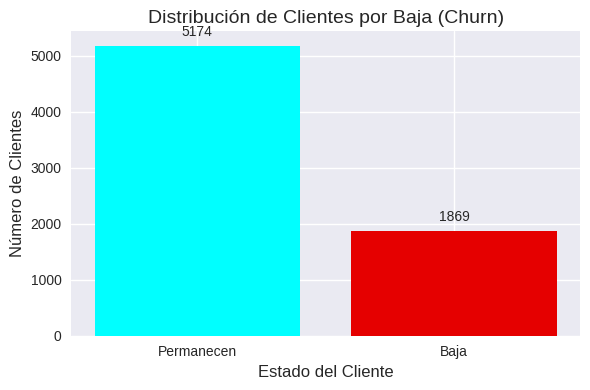

In [25]:
import matplotlib.pyplot as plt

churn_counts = df['Baja'].value_counts().sort_index()

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(churn_counts.index.map({0: 'Permanecen', 1: 'Baja'}),
              churn_counts.values,
              color=['#00FFFF', '#E50000'])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_title('Distribución de Clientes por Baja (Churn)', fontsize=14)
ax.set_xlabel('Estado del Cliente', fontsize=12)
ax.set_ylabel('Número de Clientes', fontsize=12)
plt.tight_layout()



In [26]:
tabla_genero = pd.crosstab(df['Genero'], df['Baja'], normalize='index') * 100
print(tabla_genero)

tabla_contrato = pd.crosstab(df['account_Contract'], df['Baja'], normalize='index') * 100
print(tabla_contrato)

tabla_pago = pd.crosstab(df['account_PaymentMethod'], df['Baja'], normalize='index') * 100
print(tabla_pago)

tabla_adulto = pd.crosstab(df['AdultoMayor'], df['Baja'], normalize='index') * 100
print(tabla_adulto)

tabla_Dependientes = pd.crosstab(df['Dependientes'], df['Baja'], normalize='index') * 100
print(tabla_Dependientes)

tabla_Paperless = pd.crosstab(df['account_PaperlessBilling'], df['Baja'], normalize='index') * 100
print(tabla_Paperless)

Baja          0.0        1.0
Genero                      
Female  73.079128  26.920872
Male    73.839662  26.160338
Baja                    0.0        1.0
account_Contract                      
Month-to-month    57.290323  42.709677
One year          88.730482  11.269518
Two year          97.168142   2.831858
Baja                             0.0        1.0
account_PaymentMethod                          
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700
Baja               0.0        1.0
AdultoMayor                      
0            76.393832  23.606168
1            58.318739  41.681261
Baja                0.0        1.0
Dependientes                      
0             68.720860  31.279140
1             84.549763  15.450237
Baja                            0.0        1.0
account_PaperlessBilling                      
0                         83.66

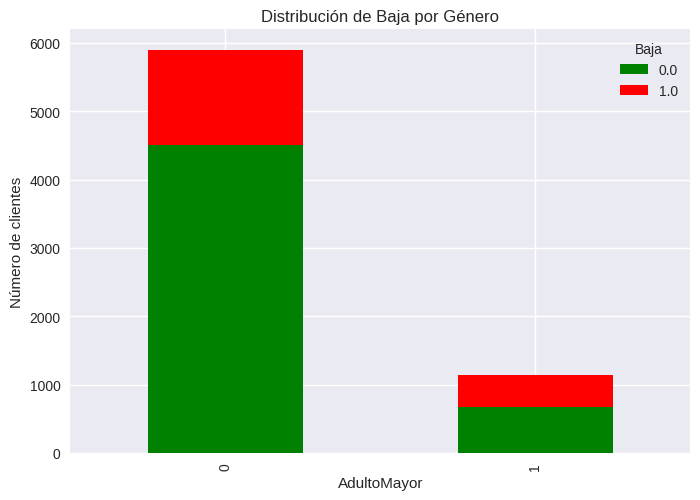

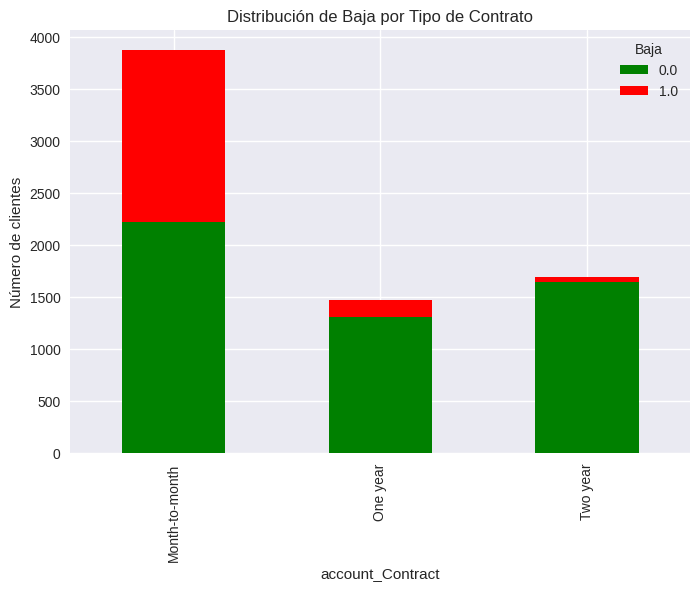

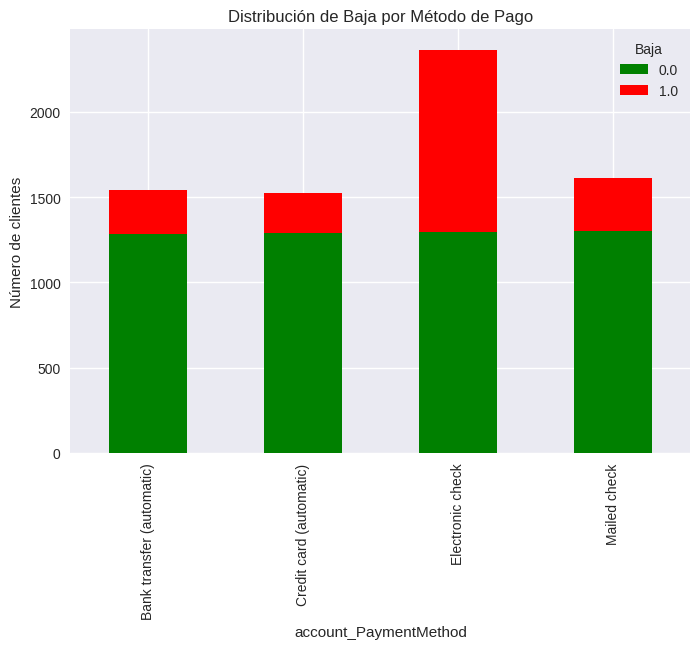

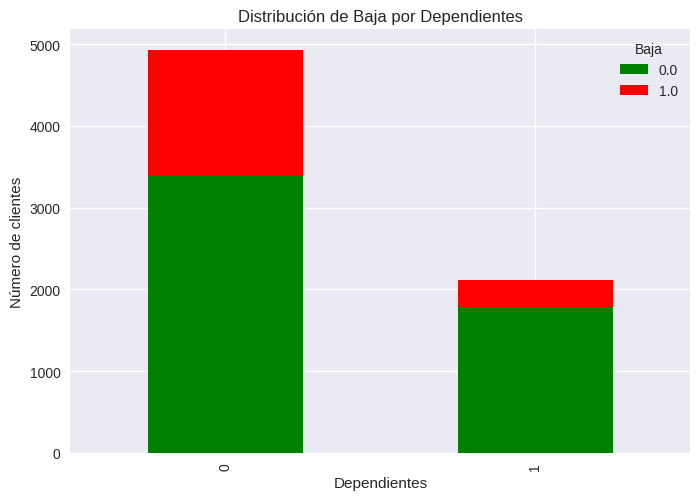

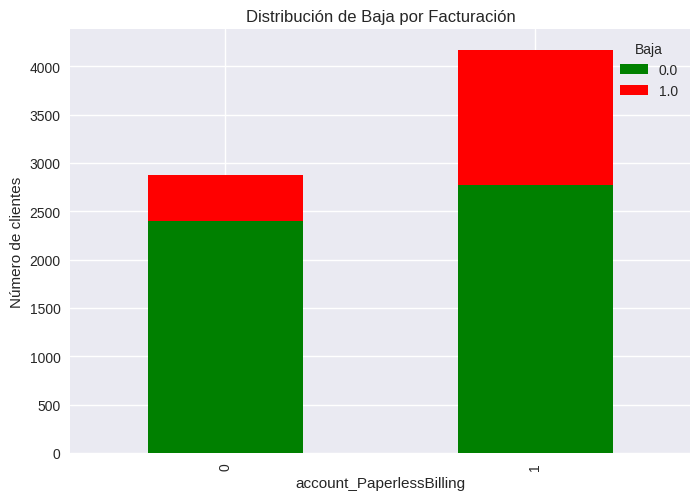

In [27]:
import matplotlib.pyplot as plt

# Género vs Baja
pd.crosstab(df['AdultoMayor'], df['Baja']).plot(kind='bar', stacked=True, color=['green','red'])
plt.title('Distribución de Baja por Género')
plt.ylabel('Número de clientes')
plt.show()

# Tipo de contrato vs Baja
pd.crosstab(df['account_Contract'], df['Baja']).plot(kind='bar', stacked=True, color=['green','red'])
plt.title('Distribución de Baja por Tipo de Contrato')
plt.ylabel('Número de clientes')
plt.show()

# Método de pago vs Baja
pd.crosstab(df['account_PaymentMethod'], df['Baja']).plot(kind='bar', stacked=True, color=['green','red'])
plt.title('Distribución de Baja por Método de Pago')
plt.ylabel('Número de clientes')
plt.show()

# Dependiantes vs Baja
pd.crosstab(df['Dependientes'], df['Baja']).plot(kind='bar', stacked=True, color=['green','red'])
plt.title('Distribución de Baja por Dependientes')
plt.ylabel('Número de clientes')
plt.show()

# Facturacion vs Baja
pd.crosstab(df['account_PaperlessBilling'], df['Baja']).plot(kind='bar', stacked=True, color=['green','red'])
plt.title('Distribución de Baja por Facturación')
plt.ylabel('Número de clientes')
plt.show()

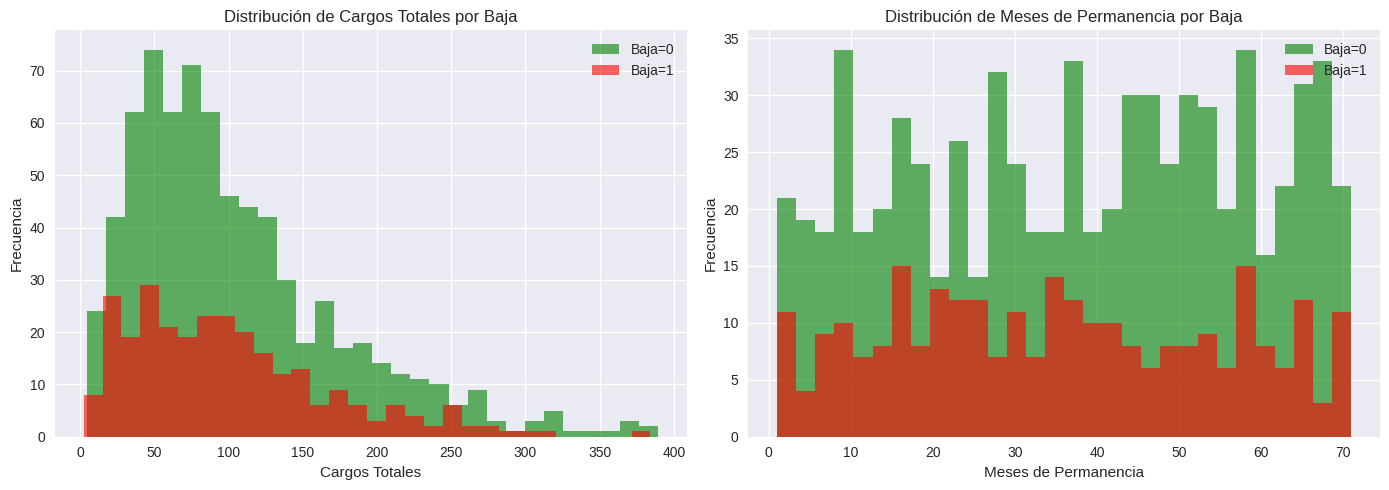

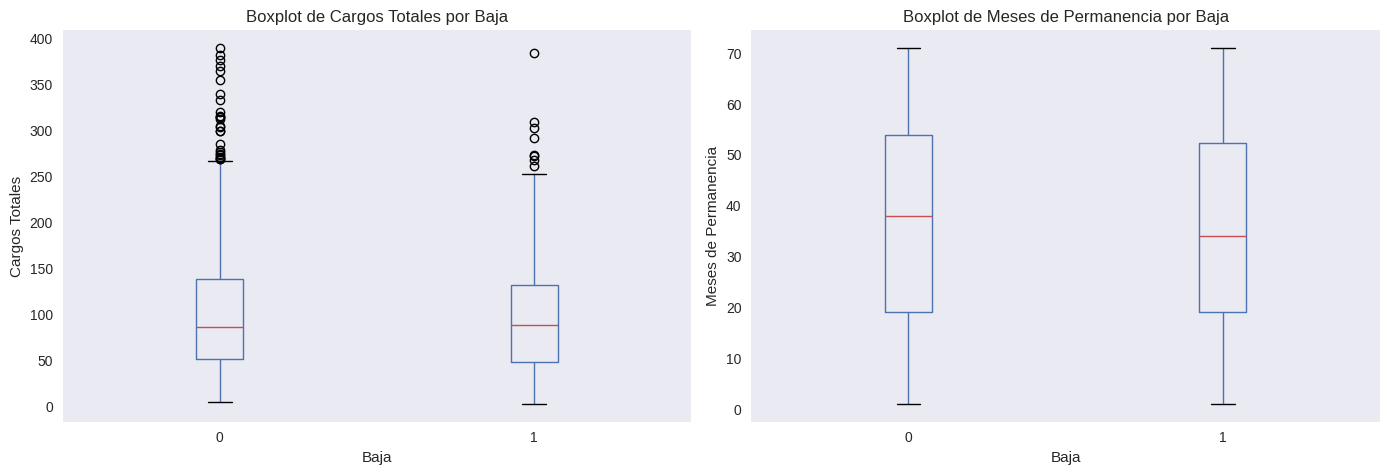

Se generaron histogramas y boxplots para comparar 'Cargos_Totales' y 'Meses_Permanencia' entre clientes que cancelaron (Baja=1) y los que no (Baja=0).


In [32]:
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
output_dir = "/mnt/data"
os.makedirs(output_dir, exist_ok=True)

# Load the dataset (assuming it's already loaded as df)
# For demonstration, we'll simulate a small DataFrame
# In actual use, replace this with: df = pd.read_csv('/mnt/data/your_file.csv')

# Simulated data for demonstration
import numpy as np
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'Cargos_Totales': np.random.gamma(2, 50, n),
    'Meses_Permanencia': np.random.randint(1, 72, n),
    'Baja': np.random.choice([0, 1], size=n, p=[0.73, 0.27])
})

# Create histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)
for baja_val, color in zip([0, 1], ['green', 'red']):
    subset = df[df['Baja'] == baja_val]
    axes[0].hist(subset['Cargos_Totales'], bins=30, alpha=0.6, label=f'Baja={baja_val}', color=color)
    axes[1].hist(subset['Meses_Permanencia'], bins=30, alpha=0.6, label=f'Baja={baja_val}', color=color)

axes[0].set_title('Distribución de Cargos Totales por Baja')
axes[0].set_xlabel('Cargos Totales')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

axes[1].set_title('Distribución de Meses de Permanencia por Baja')
axes[1].set_xlabel('Meses de Permanencia')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()

hist_path = os.path.join(output_dir, "histogramas_churn.png")
plt.tight_layout()
plt.savefig(hist_path)
plt.show()

# Create boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df.boxplot(column='Cargos_Totales', by='Baja', ax=axes[0], grid=False)
axes[0].set_title('Boxplot de Cargos Totales por Baja')
axes[0].set_xlabel('Baja')
axes[0].set_ylabel('Cargos Totales')

df.boxplot(column='Meses_Permanencia', by='Baja', ax=axes[1], grid=False)
axes[1].set_title('Boxplot de Meses de Permanencia por Baja')
axes[1].set_xlabel('Baja')
axes[1].set_ylabel('Meses de Permanencia')

plt.suptitle('')
boxplot_path = os.path.join(output_dir, "boxplots_churn.png")
plt.tight_layout()
plt.savefig(boxplot_path)
plt.show()

print("Se generaron histogramas y boxplots para comparar 'Cargos_Totales' y 'Meses_Permanencia' entre clientes que cancelaron (Baja=1) y los que no (Baja=0).")

### Informe de Análisis de Evasión de Clientes (Bajas)

🔹 Introducción

El objetivo de este análisis es comprender el problema de evasión de clientes (bajas) en la empresa de Telecom X. La evasión representa la pérdida de clientes que cancelan sus servicios, lo cual afecta directamente los ingresos y la sostenibilidad del negocio. Identificar patrones y factores asociados al churn permite diseñar estrategias para retener clientes y mejorar la rentabilidad.

🔹 Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos:

Importación de datos desde un archivo JSON alojado en GitHub.

Desanidamiento de estructuras (customer, phone, internet, account) usando pd.json_normalize para obtener un DataFrame plano.

Revisión de calidad de datos:

Detección y tratamiento de valores ausentes (isnull, imputación o eliminación según el caso).

Eliminación de duplicados (duplicated).

Conversión de columnas con errores de formato (ej. TotalCharges de texto a numérico).

Normalización de fechas (dt.normalize).

Transformaciones:

Conversión de variables categóricas “Sí/No” a binarios (1/0).

Renombrado de columnas y traducción de categorías para mayor claridad.

Creación de la columna Cuentas_Diarias a partir de la facturación mensual.

🔹 Análisis Exploratorio de Datos

Se realizaron diversos análisis descriptivos y visualizaciones:

Estadísticas descriptivas: cálculo de media, mediana, desviación estándar, valores mínimos y máximos para variables numéricas como Cargos_Mensuales, Cargos_Totales y Meses_Permanencia.

Distribución de Baja: gráfico de barras mostrando clientes que permanecieron contra los que cancelaron.

Baja por variables categóricas:

Género: distribución similar entre hombres y mujeres.

Tipo de contrato: mayor baja en contratos mensuales.

Método de pago: mayor baja en clientes que pagan manualmente, menor en pagos automáticos.

Variables numéricas vs baja:

Clientes con menor tiempo de permanencia muestran mayor tendencia a cancelar.

Clientes con menores cargos totales acumulados presentan mayor baja.

Visualizaciones utilizadas: histogramas, boxplots y gráficos de barras apilados para comparar categorías.

🔹 Conclusiones e Insights

Las bajas estsn más asociadas a contratos mensuales y métodos de pago manuales.

Los clientes con baja permanencia y bajo gasto acumulado son más propensos a cancelar.

Los clientes con contratos largos y pagos automáticos muestran mayor estabilidad.

La variable Cuentas_Diarias permite observar el costo promedio diario, útil para segmentar clientes según sensibilidad al precio.

🔹 Recomendaciones

Incentivar contratos de largo plazo: ofrecer descuentos o beneficios adicionales para clientes que migren de contratos mensuales a anuales.

Promover pagos automáticos: campañas para fomentar métodos de pago electrónicos, reduciendo la evasión.

Segmentación de clientes sensibles al churn: identificar clientes con baja permanencia y bajo gasto acumulado para ofrecer promociones personalizadas.

Programas de fidelización: recompensar a clientes con alta permanencia y gasto elevado para mantener su lealtad.

Monitoreo continuo: implementar dashboards que permitan seguir la evolución del churn y evaluar el impacto de las estrategias.

Este informe proporciona una visión integral del comportamiento de los clientes y ofrece bases sólidas para diseñar estrategias de retención que reduzcan la evasión y mejoren la rentabilidad de la empresa.